In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('KNN_Project_data',index_col=0)


In [3]:
data.head()


GWYH         TRAT        TLLZ         IGGA         HYKR  \
XVPM                                                                          
1636.670614   817.988525  2565.995189  358.347163   550.417491  1618.870897   
1013.402760   577.587332  2644.141273  280.428203  1161.873391  2084.107872   
1300.035501   820.518697  2025.854469  525.562292   922.206261  2552.355407   
1059.347542  1066.866418   612.000041  480.827789   419.467495   685.666983   
1018.340526  1313.679056   950.622661  724.742174   843.065903  1370.554164   

                    EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
XVPM                                                                          
1636.670614  2147.641254  330.727893  1494.878631   845.136088             0  
1013.402760   853.404981  447.157619  1193.032521   861.081809             1  
1300.035501   818.676686  845.491492  1968.367513  1647.186291             1  
1059.347542   852.867810  341.664784  1154.391368  1450.935357             0  
1018.340526   905.469453  658.118202   539.459350  1899.850792             0

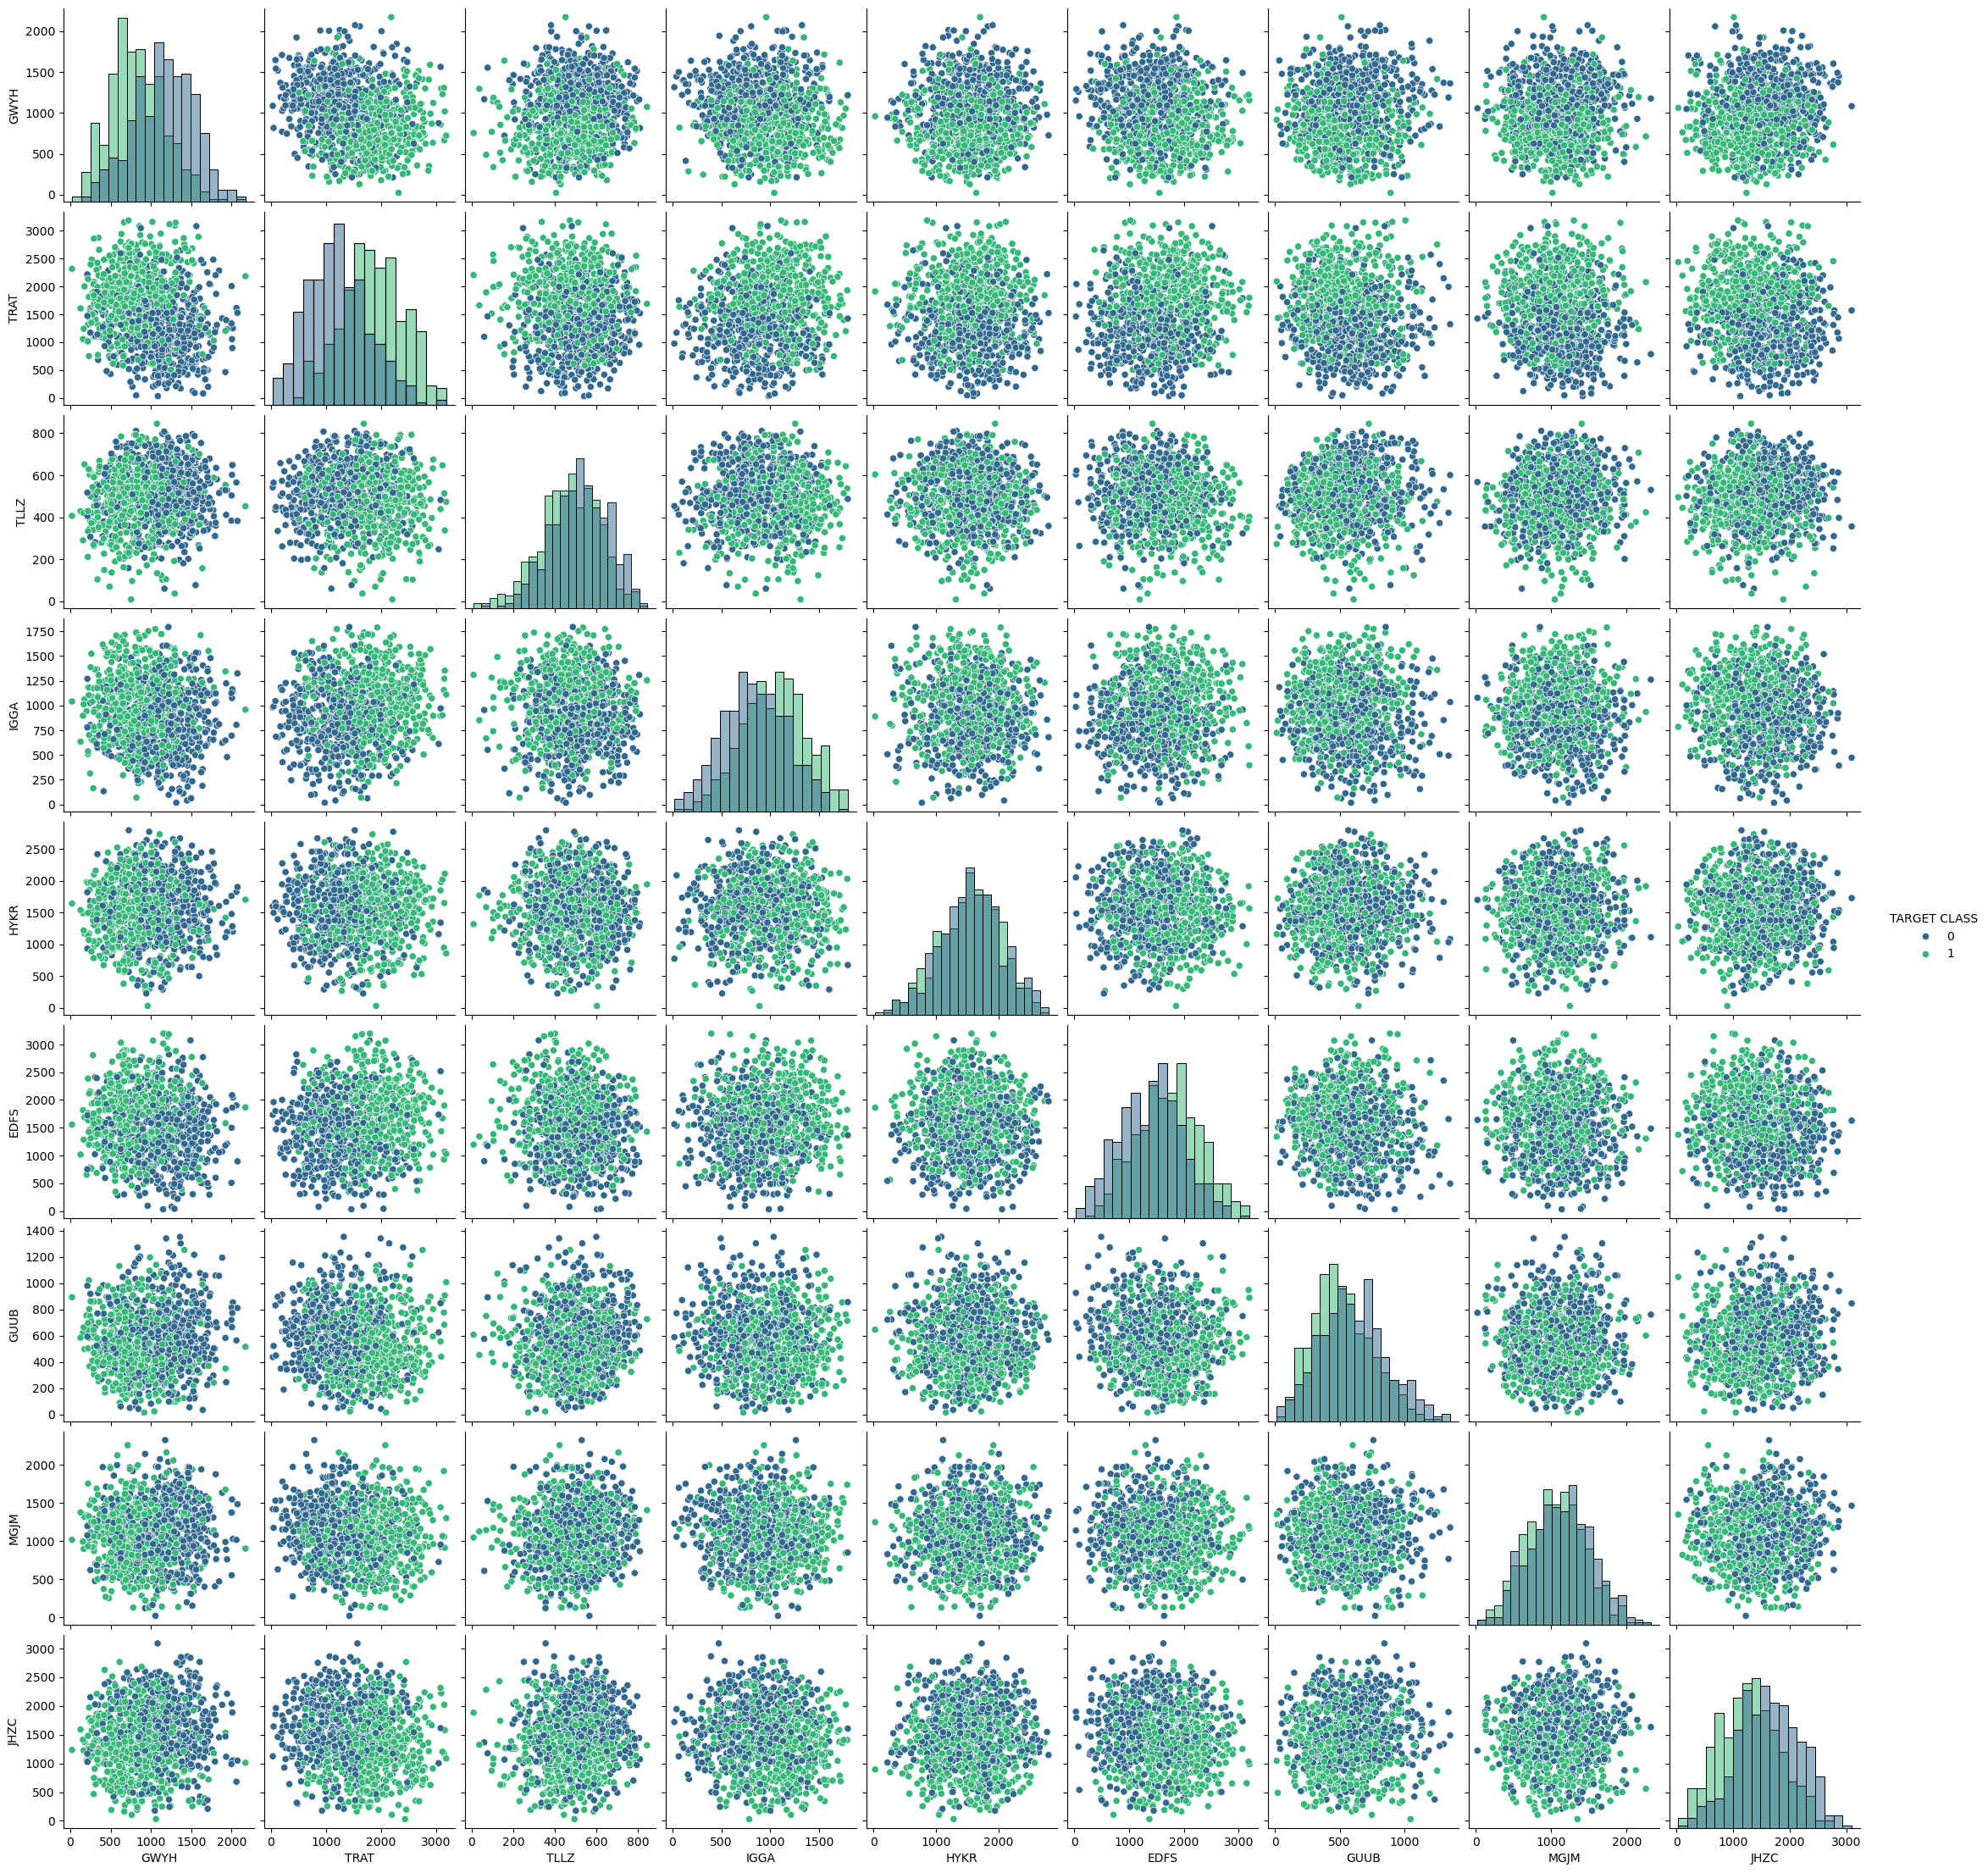

In [4]:
sns.pairplot(data,hue='TARGET CLASS',kind='scatter',diag_kind='hist',palette='viridis')


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled=scaler.transform(data.drop('TARGET CLASS',axis=1))

In [8]:
df=pd.DataFrame(scaled,columns=data.columns[:-1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df
y=data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNN=KNeighborsClassifier(n_neighbors=1)

In [13]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
predictions=KNN.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [16]:
print(confusion_matrix(y_test,predictions))


[[105  47]
 [ 39 109]]


In [17]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.73      0.69      0.71       152
           1       0.70      0.74      0.72       148

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



In [20]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi=knn.predict(X_test)
    error_rate.append(np.mean(predi!=y_test))

In [21]:
   print(i,error_rate)

39 [0.2866666666666667, 0.2866666666666667, 0.24, 0.24333333333333335, 0.22666666666666666, 0.22333333333333333, 0.19333333333333333, 0.20333333333333334, 0.19333333333333333, 0.20666666666666667, 0.2, 0.2, 0.2, 0.20666666666666667, 0.20666666666666667, 0.21, 0.19333333333333333, 0.2, 0.18333333333333332, 0.19333333333333333, 0.18666666666666668, 0.18, 0.17333333333333334, 0.18666666666666668, 0.17666666666666667, 0.17666666666666667, 0.17666666666666667, 0.18, 0.17666666666666667, 0.18333333333333332, 0.18666666666666668, 0.18333333333333332, 0.18, 0.18666666666666668, 0.17666666666666667, 0.16666666666666666, 0.16333333333333333, 0.17, 0.17]


Text(0, 0.5, 'Error Rate')

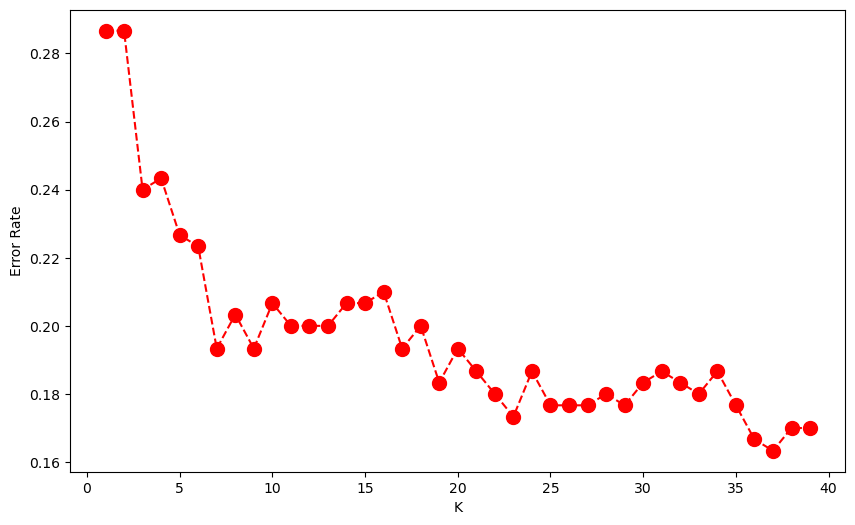

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='Red',linestyle='dashed',marker='o',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=)